<a href="https://colab.research.google.com/github/ujjualr/MachineLearning/blob/master/Wine_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [0]:
import io
red = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']),sep=";")
white=pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']),sep=";")


In [0]:
red["type"]=1
white["type"]=0

In [15]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [16]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [17]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [18]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,0.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,0.0


In [0]:
wines=red.append(white) 

In [20]:
wines.tail(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4798,5.9,0.320,0.19,14.5,0.042,37.0,115.0,0.99684,3.16,0.43,10.3,5,0
4799,6.2,0.260,0.20,8.0,0.047,35.0,111.0,0.99445,3.11,0.42,10.4,6,0
4800,6.0,0.200,0.33,1.1,0.039,45.0,126.0,0.99051,3.31,0.45,11.6,7,0
4801,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.7,7,0
4802,5.8,0.280,0.34,2.2,0.037,24.0,125.0,0.98986,3.36,0.33,12.8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


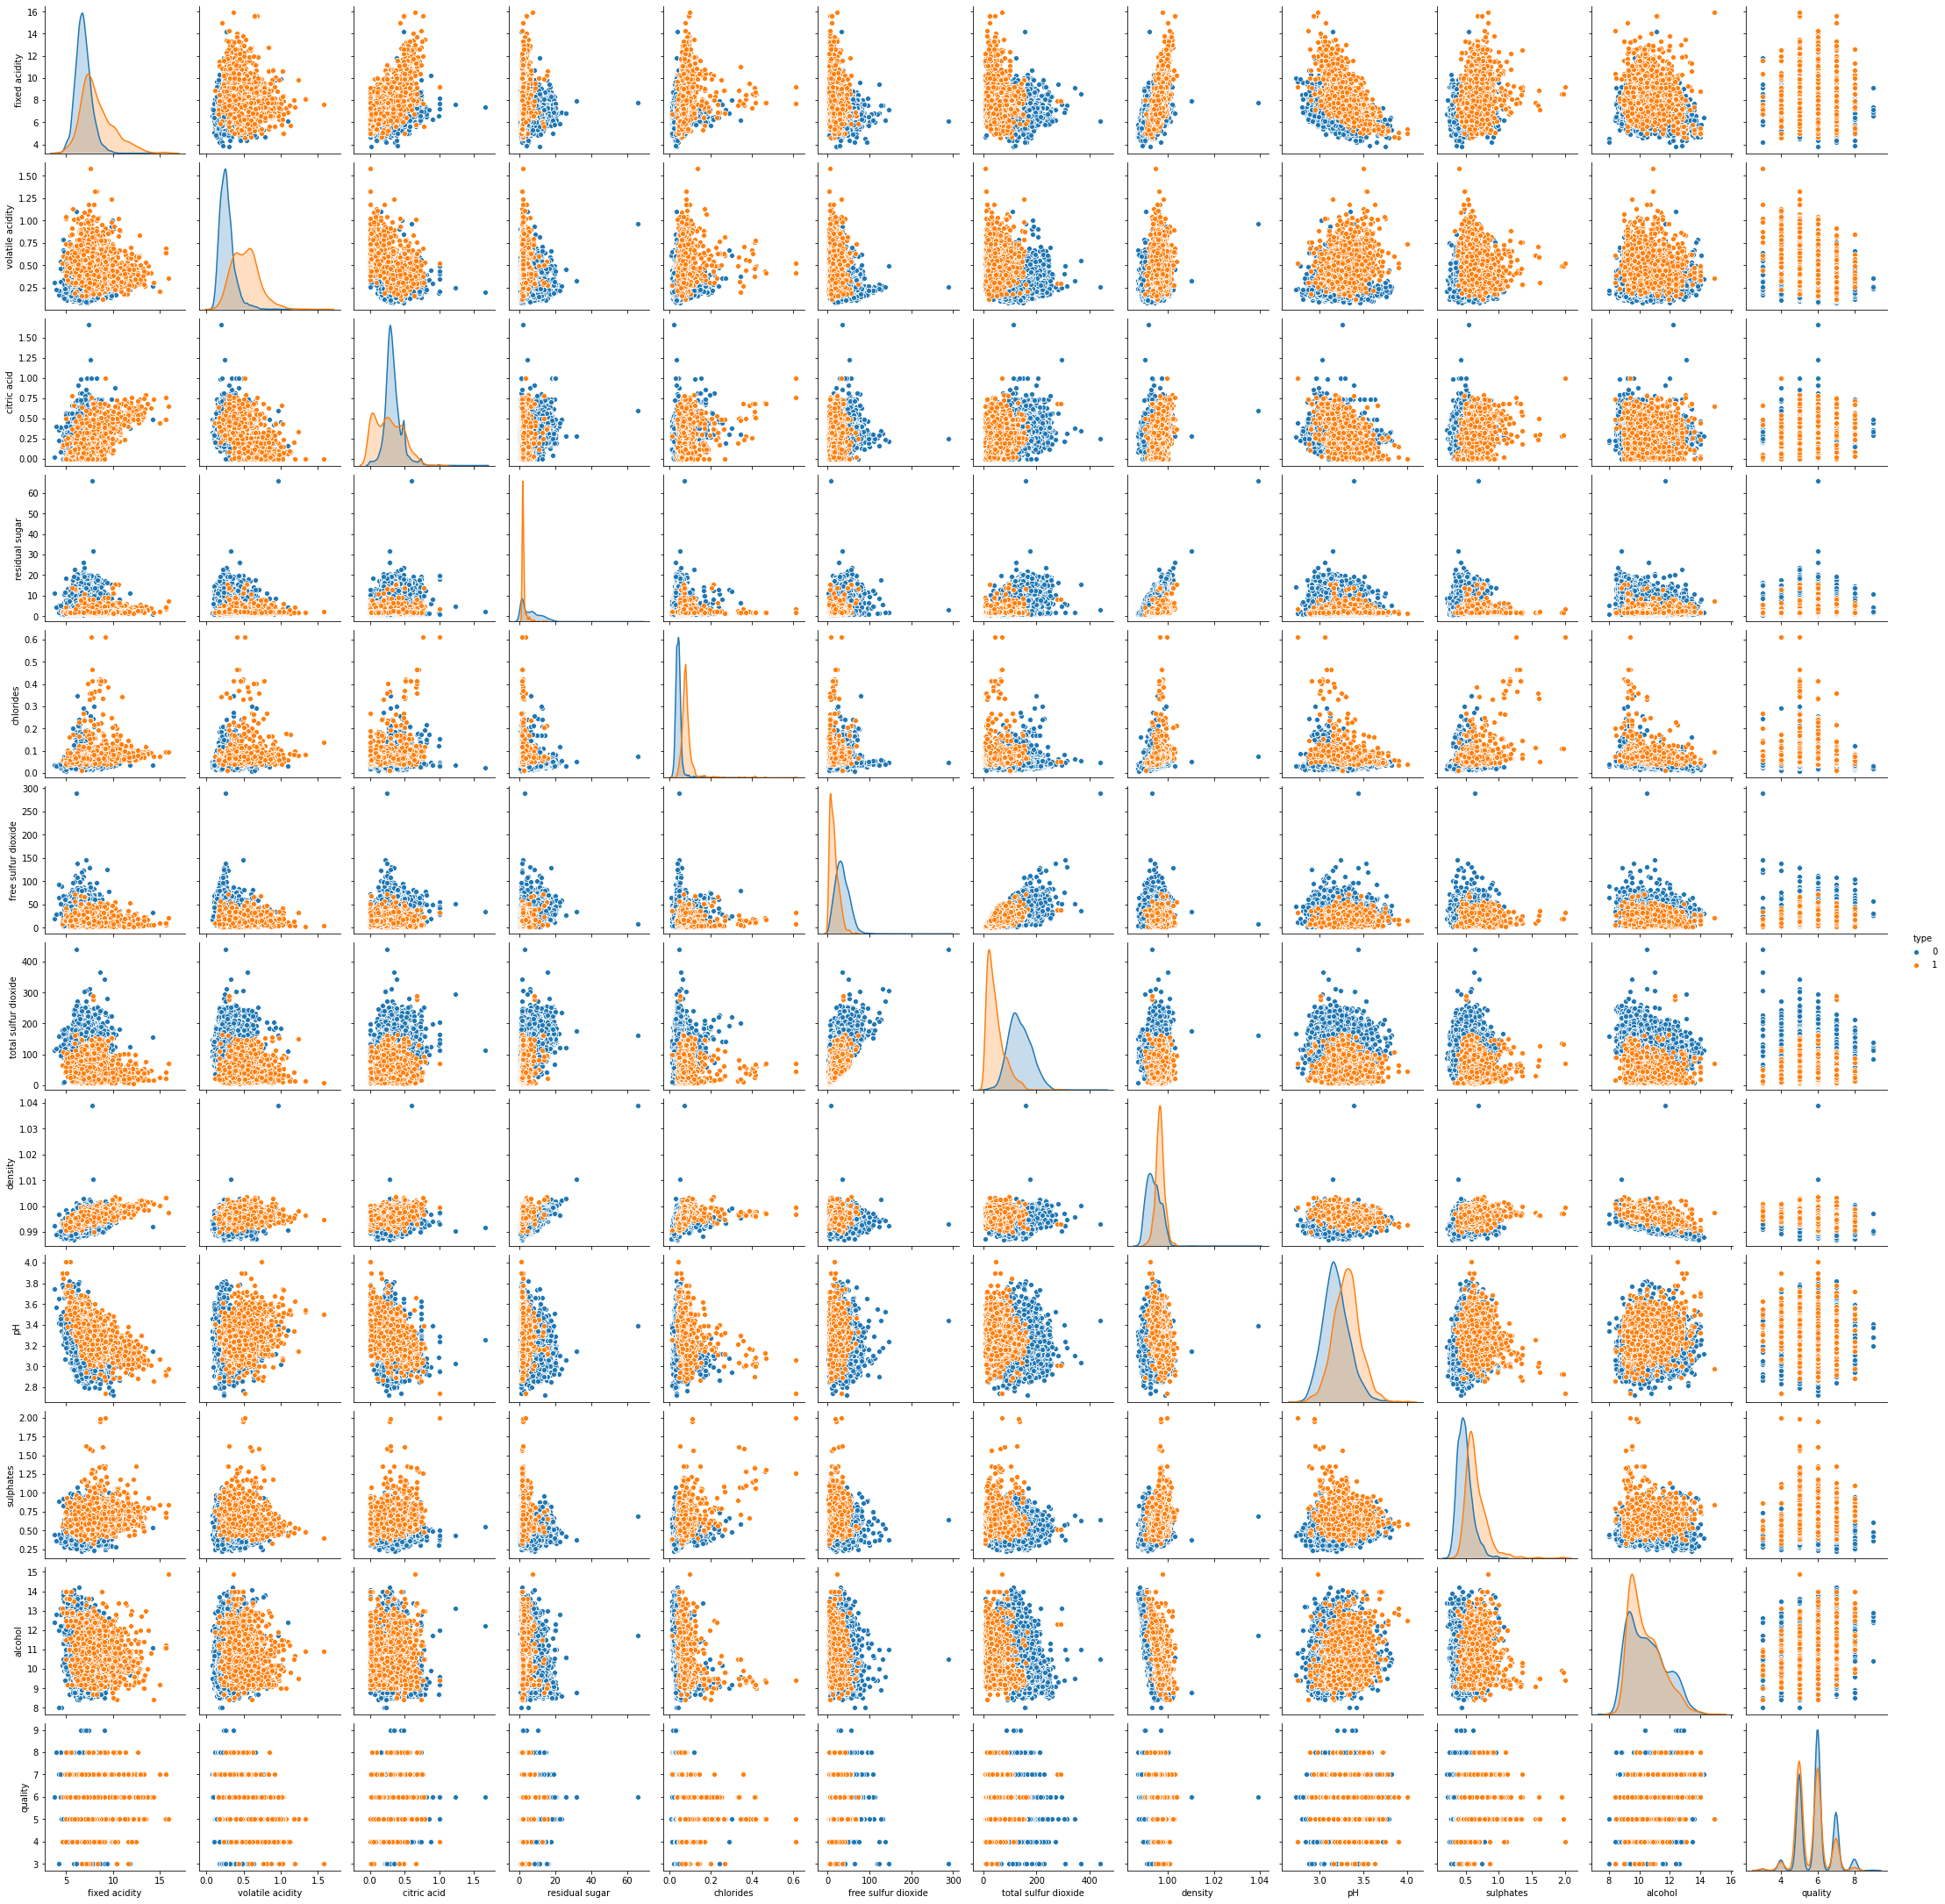

In [21]:
sns.pairplot(wines,hue="type",diag_kind="kde")

In [0]:
from sklearn.model_selection import train_test_split
X=wines.iloc[:,0:11]
y=np.ravel(wines["type"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
#empty model-Initializing Model
model= Sequential() 
#input layer
model.add(Dense(30,activation='relu',input_shape=(11,)))# 11 columns  input layer
#inner layer
model.add(Dense(20,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

 

In [73]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])#hyperparameters
epochs=20 
batch_size=50017
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.3,verbose=True )
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)

Epoch 1/20
1/1 [==============================] - 0s 115ms/step - loss: 0.6946 - accuracy: 0.4359 - val_loss: 0.6848 - val_accuracy: 0.4637
Epoch 2/20
1/1 [==============================] - 0s 31ms/step - loss: 0.6827 - accuracy: 0.4563 - val_loss: 0.6731 - val_accuracy: 0.4872
Epoch 3/20
1/1 [==============================] - 0s 31ms/step - loss: 0.6710 - accuracy: 0.4821 - val_loss: 0.6616 - val_accuracy: 0.5158
Epoch 4/20
1/1 [==============================] - 0s 29ms/step - loss: 0.6594 - accuracy: 0.5069 - val_loss: 0.6503 - val_accuracy: 0.5414
Epoch 5/20
1/1 [==============================] - 0s 29ms/step - loss: 0.6481 - accuracy: 0.5412 - val_loss: 0.6392 - val_accuracy: 0.5678
Epoch 6/20
1/1 [==============================] - 0s 28ms/step - loss: 0.6369 - accuracy: 0.5698 - val_loss: 0.6282 - val_accuracy: 0.6037
Epoch 7/20
1/1 [==============================] - 0s 29ms/step - loss: 0.6260 - accuracy: 0.6003 - val_loss: 0.6173 - val_accuracy: 0.6278
Epoch 8/20
1/1 [==========

In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_21 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 21        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [75]:
loss,acc=model.evaluate(X_test,y_test,verbose=0)
print("Test Accuracy: ",acc)
loss,acc=model.evaluate(X_train,y_train,verbose=0)
print("Train Accuracy: ",acc)
y_pred=np.round(model.predict(X_test))    


Test Accuracy:  0.8753846287727356
Train Accuracy:  0.8805806040763855


In [76]:
from sklearn import metrics
print(pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns=[0,1],index=['True: White','False:Red']))

                0    1
True: White  1236  212
False:Red      31  471
